# Лабораторная работа №2

In [40]:
import pandas as pd
df=pd.read_csv('/content/lab2.csv')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="whitegrid")

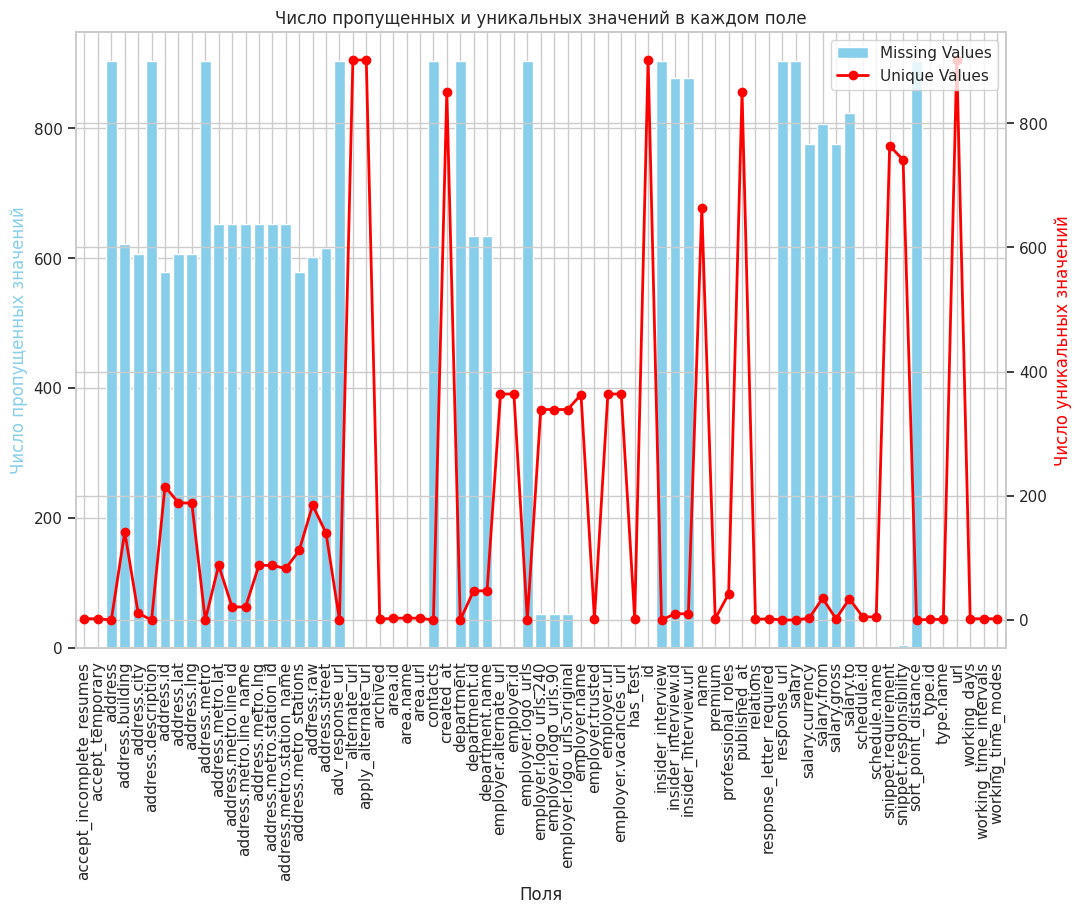

In [21]:
# 2. Построить столбиковую диаграмму по числу пропущенных значений в каждом поле
# Предварительно отсортировать частоты по убыванию

missing_values = df.isnull().sum()

missing_values_sorted = missing_values.sort_values(ascending=False)

unique_values = df.nunique()

missing_unique_df = pd.DataFrame({
    'Missing Values': missing_values_sorted,
    'Unique Values': unique_values
})

plt.figure(figsize=(12, 8))
ax = missing_unique_df['Missing Values'].plot(kind='bar', color='skyblue', width=0.8)

ax2 = ax.twinx()
missing_unique_df['Unique Values'].plot(kind='line', marker='o', color='red', ax=ax2, linewidth=2, label='Unique Values')

ax.set_xlabel('Поля')
ax.set_ylabel('Число пропущенных значений', color='skyblue')
ax2.set_ylabel('Число уникальных значений', color='red')
plt.title('Число пропущенных и уникальных значений в каждом поле')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.gca().set_facecolor('#E6E6E6')
plt.show()

<ipython-input-23-1c2f4f1ef7af>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anomalies.index, y=anomalies.values, palette='viridis')


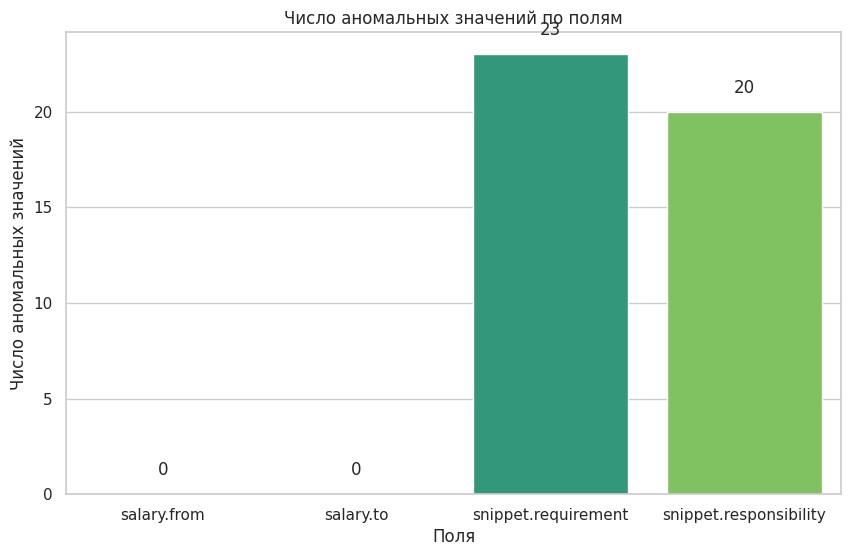

In [23]:
# 3. Построить столбиковую диаграмму по числу аномальных значений
# (слишком больших, слишком маленьких, по значению, по числу символов)
# по полям salary.from, salary.to, snippet.requirement, snippet.responsibility

def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

salary_from_outliers = find_outliers_iqr(df['salary.from'])
num_salary_from_outliers = salary_from_outliers.shape[0]

salary_to_outliers = find_outliers_iqr(df['salary.to'])
num_salary_to_outliers = salary_to_outliers.shape[0]

requirement_length = df['snippet.requirement'].astype(str).apply(len)
requirement_outliers = df['snippet.requirement'][ (requirement_length < 100) | (requirement_length > 1000) ]
num_requirement_outliers = requirement_outliers.shape[0]

responsibility_length = df['snippet.responsibility'].astype(str).apply(len)
responsibility_outliers = df['snippet.responsibility'][ (responsibility_length < 100) | (responsibility_length > 1000) ]
num_responsibility_outliers = responsibility_outliers.shape[0]

anomalies = pd.Series({
    'salary.from': num_salary_from_outliers,
    'salary.to': num_salary_to_outliers,
    'snippet.requirement': num_requirement_outliers,
    'snippet.responsibility': num_responsibility_outliers
})

plt.figure(figsize=(10, 6))
sns.barplot(x=anomalies.index, y=anomalies.values, palette='viridis')
plt.xlabel('Поля')
plt.ylabel('Число аномальных значений')
plt.title('Число аномальных значений по полям')

for index, value in enumerate(anomalies.values):
    plt.text(index, value + 1, str(value), ha='center')

plt.show()

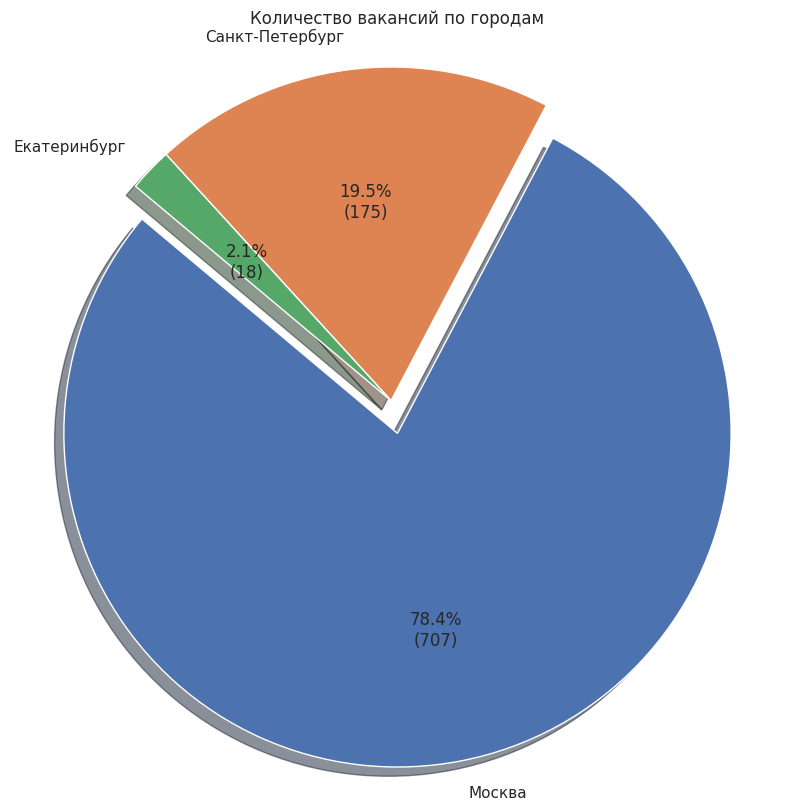

In [13]:
# 4. Построить круговую диаграмму по количеству вакансий в городах (area.name)
city_counts = df['area.name'].value_counts()

top_city = city_counts.idxmax()
explode = [0.1 if city == top_city else 0 for city in city_counts.index]

plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=city_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*city_counts.sum())})",
        startangle=140, explode=explode, shadow=True)
plt.title('Количество вакансий по городам')
plt.axis('equal')
plt.show()


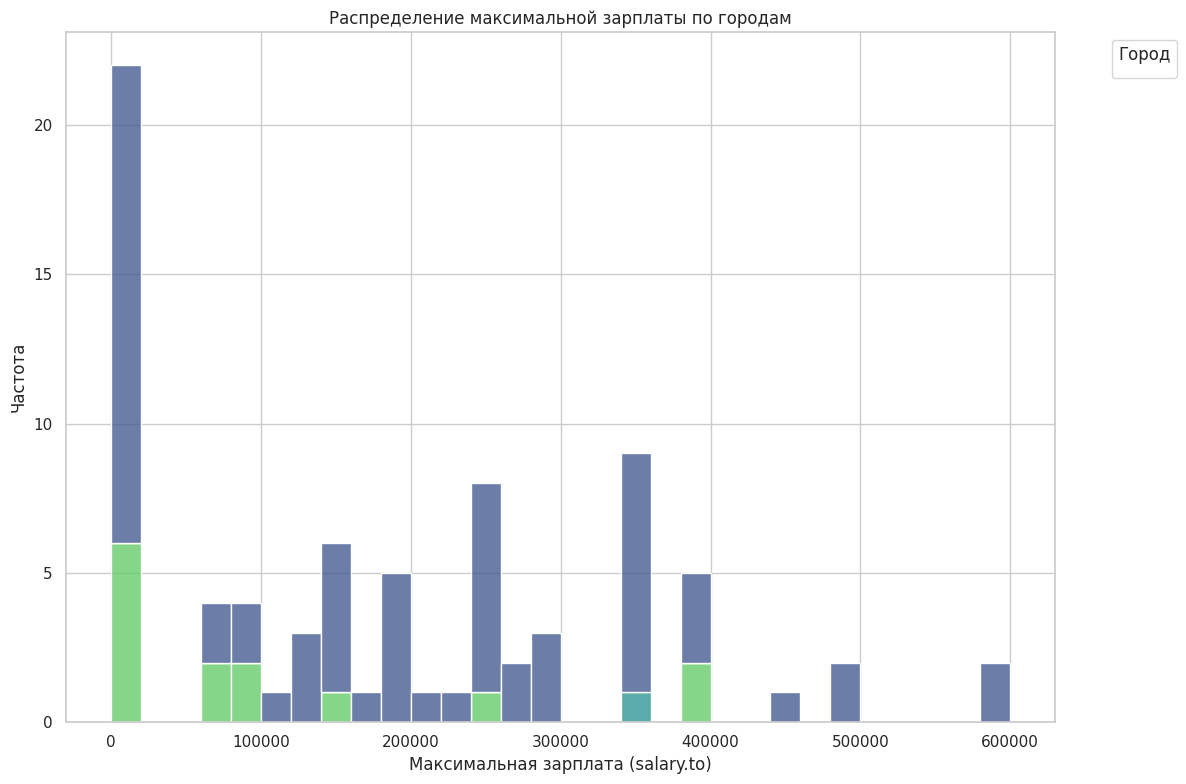

In [15]:
# 5. Построить гистограмму по полю salary.to

df_salary = df[['salary.to', 'area.name']].dropna()

plt.figure(figsize=(12, 8))
sns.histplot(data=df_salary, x='salary.to', hue='area.name', multiple='stack', palette='viridis', bins=30)
plt.xlabel('Максимальная зарплата (salary.to)')
plt.ylabel('Частота')
plt.title('Распределение максимальной зарплаты по городам')
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


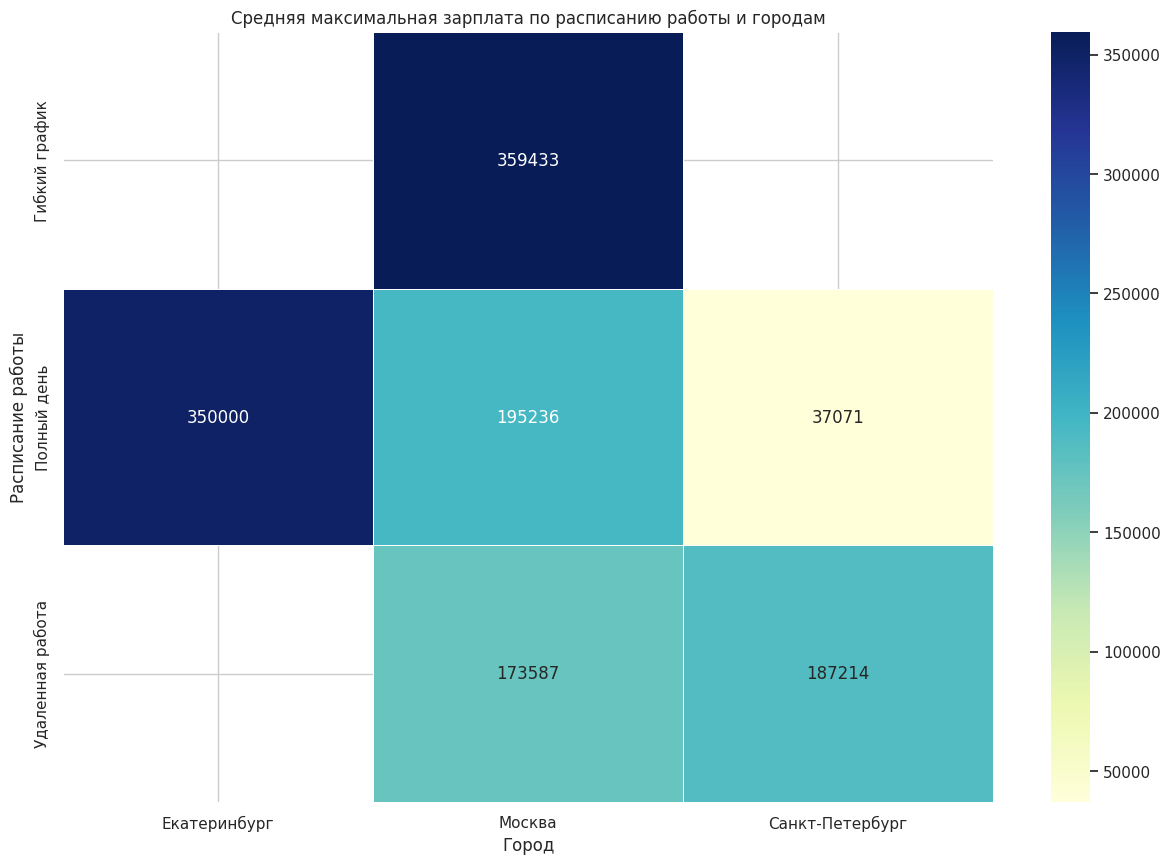

In [29]:
# 6. Построить тепловую карту средней зарплаты по salary.to в разрезе расписания работы и города

df_heatmap = df[['salary.to', 'schedule.name', 'area.name']].dropna()

pivot_table = df_heatmap.pivot_table(values='salary.to', index='schedule.name', columns='area.name', aggfunc='mean')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.title('Средняя максимальная зарплата по расписанию работы и городам')
plt.xlabel('Город')
plt.ylabel('Расписание работы')
plt.show()


<ipython-input-32-948f7f6c2fef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area.name', y='salary.from', data=df, palette=palette)


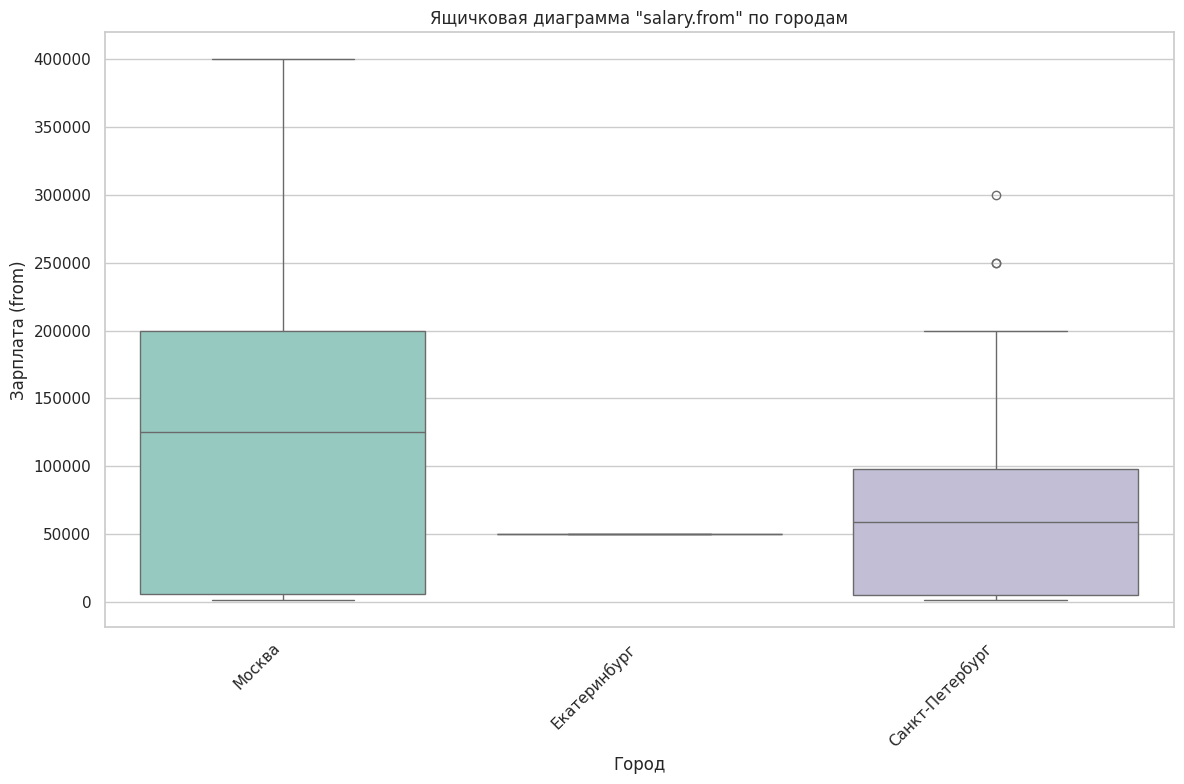

In [32]:
# 7. Ящичковая диаграмма по полю salary.from в разрезе города
plt.figure(figsize=(12, 8))
unique_cities = df['area.name'].unique()
palette = sns.color_palette("Set3", len(unique_cities))

sns.boxplot(x='area.name', y='salary.from', data=df, palette=palette)

plt.title('Ящичковая диаграмма "salary.from" по городам')
plt.xlabel('Город')
plt.ylabel('Зарплата (from)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


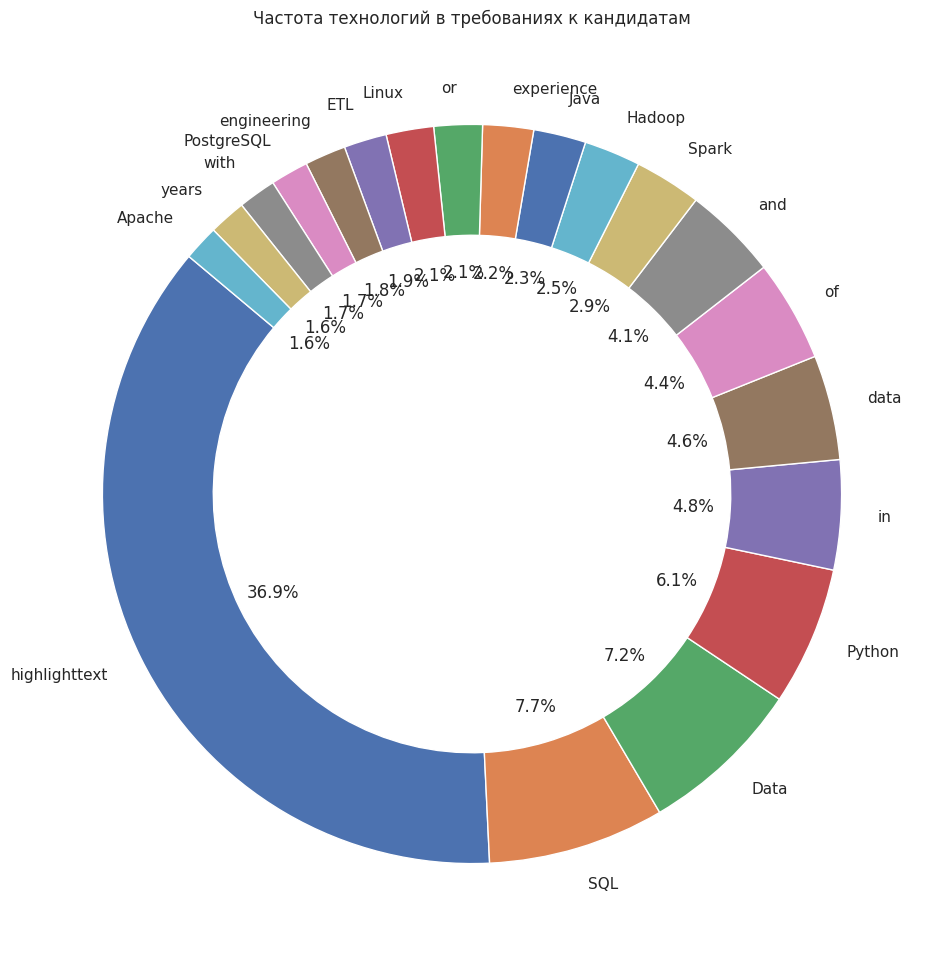

In [34]:
# 8. Пончиковая диаграмма по частоте технологий

from collections import Counter

requirements = ' '.join(df['snippet.requirement'].dropna().astype(str))

tech_pattern = r'\b[A-Za-z0-9\-\+]{2,}\b'

techs = re.findall(tech_pattern, requirements)

tech_counts = Counter(techs).most_common(20)

labels, sizes = zip(*tech_counts)

plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

plt.title('Частота технологий в требованиях к кандидатам')
plt.show()
